### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np
# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()

### Load study

In [2]:
# Define study
STUDY_NAME = "injection_oct_scan"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

In [3]:

# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

### Plot

In [4]:

# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="i_oct_b1", values="normalized amplitude in xy-plane")

l_oct = np.linspace(-50,50,21)

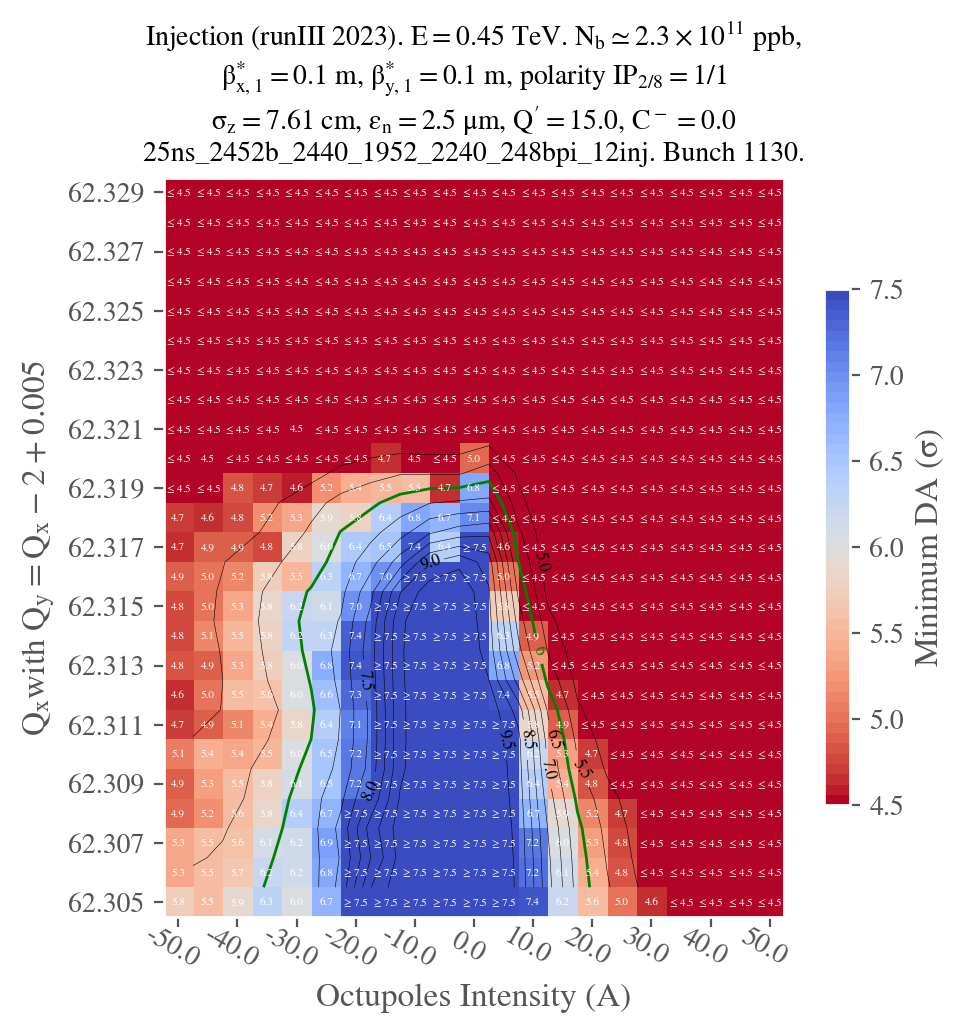

In [5]:
df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = "Octupoles Intensity (A)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx = 0.1,
    bety = 0.1,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    #title="opt_collapse_1100_1500_oct_scan",
)